In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as int
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,7)

We consider $y'' + by' + cy = 0$. We need to convert into a system of first-order ODEs by setting $u = y'$. Then we get

$$
u' = -b/a u - c/a y
$$

and

$$
y' = u
$$

In the code, we set the vector $X = [u \, y]^T$

In [23]:
a = 1
b = 1
c = 5

In [24]:
def dX_dt(X, t=0):
    return np.array([ -b/a*X[0] -   c/a*X[1] ,
                           X[0] ])

In [25]:
t  = np.linspace(0, 20, 1000)
y0 = [1. , 1.]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Functions u and y')

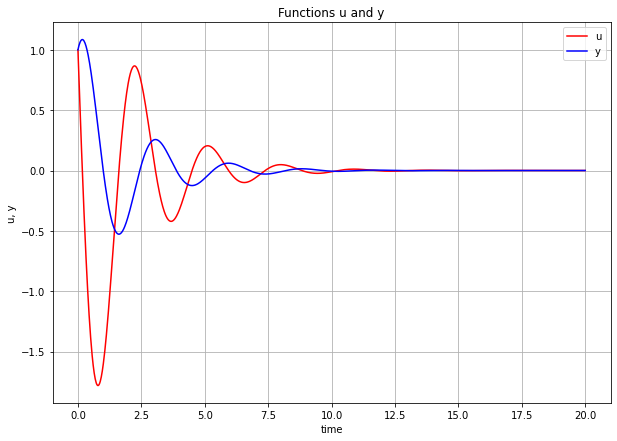

In [26]:
u, y = X.T

plt.plot(t, u, 'r-', label='u')
plt.plot(t, y  , 'b-', label='y')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('u, y')
plt.title('Functions u and y')

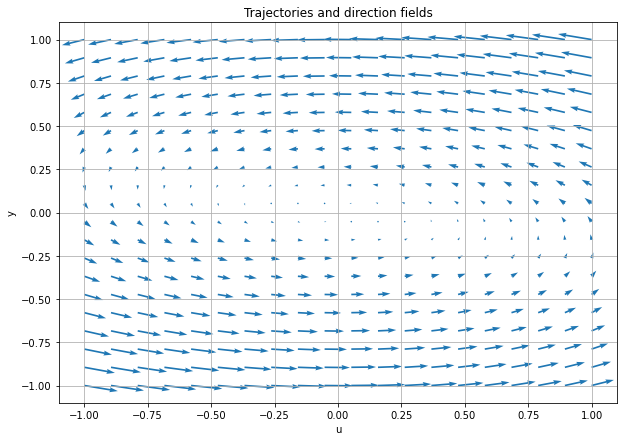

In [27]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute derivative on grid

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('u')
plt.ylabel('y')
plt.grid()